In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [7]:
def compute_histogram(image, number_bins=256):

    image_height = image.shape[0]
    image_width = image.shape[1]
    histogram = np.zeros([number_bins], np.uint16)

    for x in range(0, image_height):
        for y in range(0, image_width):
            histogram[image[x,y]] +=1

    return histogram

def plot_histogram(histogram , name):
    plt.figure()
    plt.title("Gray Image Histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0, 256])
    plt.plot(histogram[:]) 
    plt.savefig(name)
    plt.show();



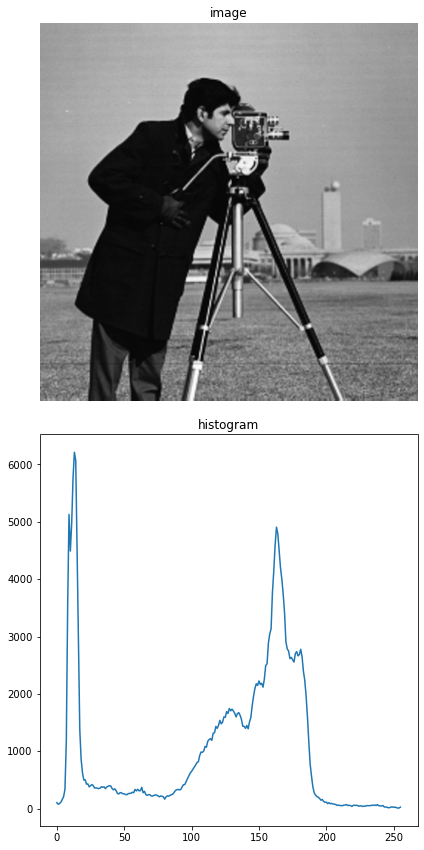

In [8]:
im1 = cv.imread('../Images/2/Camera Man.bmp')
hist_before = compute_histogram(im1)
fig = plt.figure(1 , (6,12))

# show original image
fig.add_subplot(211)
plt.title('image')
plt.set_cmap('gray')
plt.imshow(im1)
plt.axis('off')

# show image histogram
fig.add_subplot(212)
plt.title('histogram')
plt.plot(hist_before)
fig.tight_layout()

fig.savefig('camera_man_and_hist' , dpi = 200)
plt.show()

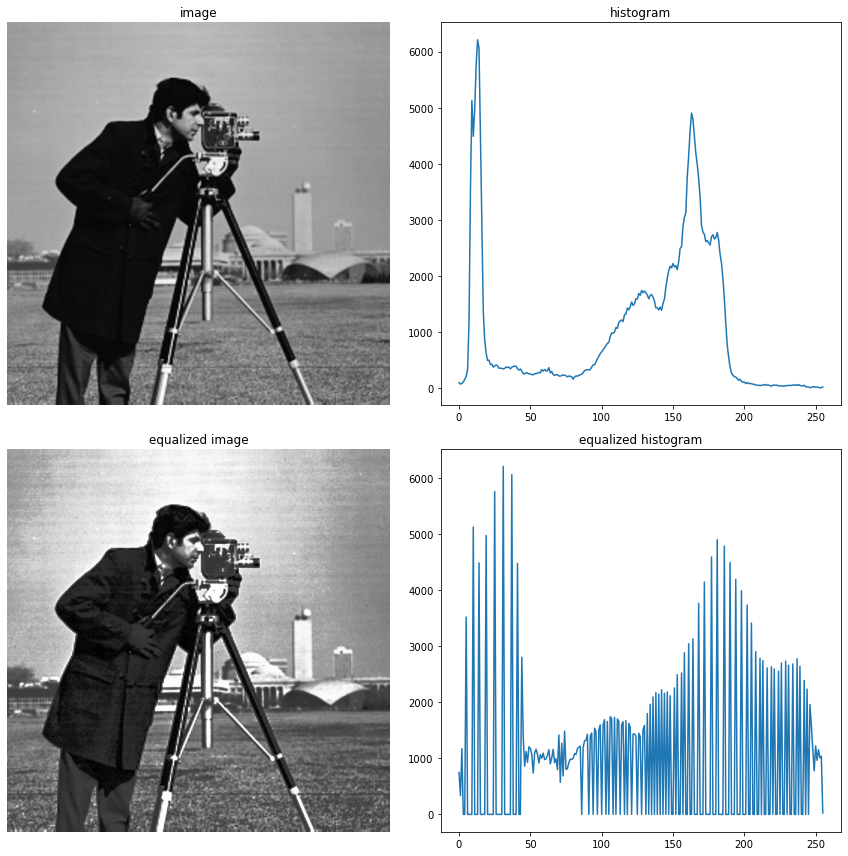

In [9]:
def image_histogram_equalization(image, number_bins=256):
    # get image histogram
    image_histogram = compute_histogram(image)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    cdf = cdf.astype(np.uint8)
    flatten_img = image.flatten()
    image_equalized = np.fromiter((cdf[xi] for xi in flatten_img), flatten_img.dtype)

    return image_equalized.reshape(image.shape)
equalized = image_histogram_equalization(im1)
hist_equalized = compute_histogram(equalized)
fig2 = plt.figure(1 , (12,12))

# show original image
fig2.add_subplot(221)
plt.title('image')
plt.set_cmap('gray')
plt.imshow(im1)
plt.axis('off')

# show image histogram
fig2.add_subplot(222)
plt.title('histogram')
plt.plot(hist_before)
fig2.tight_layout()

# show equalized image
fig2.add_subplot(223)
plt.title('equalized image')
plt.set_cmap('gray')
plt.imshow(equalized)
plt.axis('off')

# show equalized histogram
fig2.add_subplot(224)
plt.title('equalized histogram')
plt.plot(hist_equalized)
fig2.tight_layout()


fig2.savefig('camera_equalized_and_hist' , dpi = 200)
plt.show()

In [10]:
def local_image_histogram_equalization(image , segment_count):  
    # segment_count variable determines how many segments input image will be divided to on each axis
    
    segment_height = int(image.shape[0]/segment_count)
    segment_width = int(image.shape[1]/segment_count)
    result = np.zeros(image.shape, dtype=int)
    for i in range(segment_count):
        for j in range(segment_count):
            segment = image[i*segment_height:(i+1)*segment_height ,j*segment_width:(j+1)*segment_width]
            equilized_segment = image_histogram_equalization(segment)
            result[i*segment_height:(i+1)*segment_height ,j*segment_width:(j+1)*segment_width] = equilized_segment
    return result

def their_local_image_histogram_equalization(image , window_radius=5):
    def get_equalized_center_pixel_value(neighborhood):
        neighborhood_histogram = compute_histogram(neighborhood)
        cdf = neighborhood_histogram.cumsum() # cumulative distribution function
        cdf = 255 * cdf / cdf[-1] # normalize
        cdf = cdf.astype(np.uint8)
        result = cdf[neighborhood[int(neighborhood.shape[0]/2) , int(neighborhood.shape[1]/2)]]
        return result
        
    temp = np.zeros((image.shape[0]+2*window_radius , image.shape[1]+2*window_radius) , dtype=np.uint8)
    temp[window_radius:window_radius+image.shape[0] , window_radius:window_radius + image.shape[1] ] = image
    result = np.zeros(image.shape,dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = get_equalized_center_pixel_value(temp[i:i+window_radius*2+1 , j:j+window_radius*2+1])
    
    
    return result

In [ ]:
for i in range(1,5):
    im_raw = cv.imread(f'../Images/2/HE{i}.jpg', cv.IMREAD_GRAYSCALE)
    segment_count = 2
    locally_equalized = local_image_histogram_equalization(im_raw , segment_count)
    plt.figure()
    plt.imshow(locally_equalized)
    cv.imwrite(f'HE{i}_{segment_count}_equalized.jpg', locally_equalized) 

In [ ]:
for i in range(1,5):
    im_raw = cv.imread(f'../Images/2/HE{i}.jpg', cv.IMREAD_GRAYSCALE)
    windows_radius = 15
    locally_equalized = their_local_image_histogram_equalization(im_raw , windows_radius)
    plt.figure()
    plt.imshow(locally_equalized)
    cv.imwrite(f'HE{i}_sliding_window_{windows_radius}_equalized.jpg', locally_equalized) 